In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Import necessary files for analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

<h2> Climate data analysis on Melbourne, Fl dataset </h2>

In [9]:
# Load the data
# Hourly climate data of Melbourne, FL
path="/content/drive/MyDrive/Climate Data/kmlb_hrly_vals_2019.csv"
melbourne_data = pd.read_csv(path)
print(melbourne_data)

                     time  temp  dewpt  wind_spd  precip_1hr
0     2019-01-01 01:00:00  69.0   67.0       NaN         0.0
1     2019-01-01 02:00:00  69.0   67.0       NaN         0.0
2     2019-01-01 03:00:00  68.0   66.0       NaN         0.0
3     2019-01-01 04:00:00  66.0   64.0       NaN         0.0
4     2019-01-01 05:00:00  65.0   64.0       NaN         0.0
...                   ...   ...    ...       ...         ...
8754  2019-12-31 19:00:00  60.0   49.0       NaN         0.0
8755  2019-12-31 20:00:00  60.0   48.0       NaN         0.0
8756  2019-12-31 21:00:00  57.0   51.0       NaN         0.0
8757  2019-12-31 22:00:00  55.0   50.0       NaN         0.0
8758  2019-12-31 23:00:00  54.0   49.0       NaN         0.0

[8759 rows x 5 columns]


<h3> Explore the data </h3>

In [10]:
# To get the shape of the dataframe
print("Dataset shape: ", melbourne_data.shape)

Dataset shape:  (8759, 5)


In [11]:
# Get the summary of dataframe
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        8759 non-null   object 
 1   temp        8683 non-null   float64
 2   dewpt       8683 non-null   float64
 3   wind_spd    0 non-null      float64
 4   precip_1hr  8153 non-null   float64
dtypes: float64(4), object(1)
memory usage: 342.3+ KB


In [12]:
# Get the column names
melbourne_data.columns

Index(['time', 'temp', 'dewpt', 'wind_spd', 'precip_1hr'], dtype='object')

In [13]:
# To get the description of the dataframe
print("Description of the dataframe:\n ", melbourne_data.describe())

Description of the dataframe:
                temp        dewpt  wind_spd   precip_1hr
count  8683.000000  8683.000000       0.0  8153.000000
mean     75.248071    66.380053       NaN     0.005878
std       9.661977     9.263527       NaN     0.043711
min      37.000000    28.000000       NaN     0.000000
25%      70.000000    61.000000       NaN     0.000000
50%      77.000000    69.000000       NaN     0.000000
75%      82.000000    74.000000       NaN     0.000000
max      96.000000    81.000000       NaN     1.470000


In [14]:
# Detect missing values
print("Missing Values: \n", melbourne_data.isnull())
print("\n", melbourne_data.isnull().sum())

Missing Values: 
        time   temp  dewpt  wind_spd  precip_1hr
0     False  False  False      True       False
1     False  False  False      True       False
2     False  False  False      True       False
3     False  False  False      True       False
4     False  False  False      True       False
...     ...    ...    ...       ...         ...
8754  False  False  False      True       False
8755  False  False  False      True       False
8756  False  False  False      True       False
8757  False  False  False      True       False
8758  False  False  False      True       False

[8759 rows x 5 columns]

 time             0
temp            76
dewpt           76
wind_spd      8759
precip_1hr     606
dtype: int64


<h3> Data Cleaning </h3>

In [15]:
# Drop wind_spd column as it has 8759 null values
melbourne_data_decent = melbourne_data.drop(['wind_spd'],axis=1)
print(melbourne_data_decent)

                     time  temp  dewpt  precip_1hr
0     2019-01-01 01:00:00  69.0   67.0         0.0
1     2019-01-01 02:00:00  69.0   67.0         0.0
2     2019-01-01 03:00:00  68.0   66.0         0.0
3     2019-01-01 04:00:00  66.0   64.0         0.0
4     2019-01-01 05:00:00  65.0   64.0         0.0
...                   ...   ...    ...         ...
8754  2019-12-31 19:00:00  60.0   49.0         0.0
8755  2019-12-31 20:00:00  60.0   48.0         0.0
8756  2019-12-31 21:00:00  57.0   51.0         0.0
8757  2019-12-31 22:00:00  55.0   50.0         0.0
8758  2019-12-31 23:00:00  54.0   49.0         0.0

[8759 rows x 4 columns]


In [16]:
# Impute missing values using the mean
melbourne_data_decent['temp'] = melbourne_data_decent['temp'].fillna(melbourne_data_decent['temp'].mean())
melbourne_data_decent['precip_1hr'] = melbourne_data_decent['precip_1hr'].fillna(melbourne_data_decent['precip_1hr'].mean())
melbourne_data_decent['dewpt'] = melbourne_data_decent['dewpt'].fillna(melbourne_data_decent['dewpt'].mean())

print(melbourne_data_decent.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        8759 non-null   object 
 1   temp        8759 non-null   float64
 2   dewpt       8759 non-null   float64
 3   precip_1hr  8759 non-null   float64
dtypes: float64(3), object(1)
memory usage: 273.8+ KB
None


<h3> Analysis of data </h3>

In [17]:
# total number of hours that it rained using the precipitation values
total_rainy_hours = (melbourne_data_decent['precip_1hr'] > 0).sum()
print("Total rainy hours: ", total_rainy_hours)

Total rainy hours:  1135


In [18]:
# Count the number of rows where temperature is greater than 100
num_hours_above_100 = (melbourne_data_decent['temp'] > 100).sum()
print("Total number of hours when temperature was greater than 100: ", num_hours_above_100)

Total number of hours when temperature was greater than 100:  0


In [19]:
# Count the number of rows where temperature is below 32
num_hours_below_32 = (melbourne_data_decent['temp'] < 32).sum()
print("Total number of hours when temperature was less than 32: ", num_hours_below_32)

Total number of hours when temperature was less than 32:  0


In [20]:
# Average temperature for each month
melbourne_data_decent['time'] = pd.to_datetime(melbourne_data_decent['time'])
# Create a new column 'month' containing the month of each datetime value
melbourne_data_decent['month'] = melbourne_data_decent['time'].dt.month
# Group the data by 'month' and calculate the mean of the 'temp' column for each group
monthly_avg_temp = melbourne_data_decent.groupby('month')['temp'].mean()
print(monthly_avg_temp)

month
1     62.885244
2     69.869048
3     68.650401
4     74.454167
5     79.055108
6     81.987845
7     82.869624
8     82.293011
9     83.146178
10    80.123302
11    68.899773
12    68.447446
Name: temp, dtype: float64


In [21]:
#Sum of rainfall for each month
melbourne_data_decent['time'] = pd.to_datetime(melbourne_data_decent['time'])
melbourne_data_decent['month'] = melbourne_data_decent['time'].dt.month
monthly_sum_rainfall = melbourne_data_decent.groupby('month')['precip_1hr'].sum()

print(monthly_sum_rainfall)


month
1     4.470000
2     3.290000
3     2.851755
4     1.660000
5     3.570000
6     4.620000
7     3.650000
8     7.810000
9     2.025878
10    6.085554
11    2.917481
12    8.531153
Name: precip_1hr, dtype: float64


In [22]:
# Total average temperature
avg_temp = melbourne_data_decent['temp'].mean()
print("Total average temperature: ",avg_temp)

Total average temperature:  75.24807094322239


In [23]:
# Calculate the humidity using values from the listed hourly temperature (T) and dew point (TD) values
# Function to calculate humidity using the provided formula
def calculate_humidity(temp, dewpt):
    h = 100 * np.exp(17.625 * dewpt / (243.04 + dewpt)) / np.exp(17.625 * temp / (243.04 + temp))
    return h
# Apply the function to each row and assign the result to a new column 'H'
melbourne_data_decent['H'] = melbourne_data_decent.apply(lambda row: calculate_humidity(row['temp'], row['dewpt']), axis=1)

print(melbourne_data_decent['H'])

0       91.525356
1       91.525356
2       91.473002
3       91.366854
4       95.572003
          ...    
8754    58.718017
8755    55.832090
8756    74.727538
8757    78.252373
8758    78.121947
Name: H, Length: 8759, dtype: float64


In [24]:
melbourne_data_decent.columns

Index(['time', 'temp', 'dewpt', 'precip_1hr', 'month', 'H'], dtype='object')

<h2> Climate data analysis on San Diego, CA dataset </h2>

In [25]:
# Load the data
# Hourly climate data of San Diego, CA
npath="/content/drive/MyDrive/Climate Data/ksan_hrly_vals_2019.csv"
sanDiego_data = pd.read_csv(npath)
print(sanDiego_data)

                     time  temp  dewpt  wind_spd  precip_1hr
0     2019-01-01 01:00:00  47.0   40.0       NaN         0.0
1     2019-01-01 02:00:00  47.0   35.0       NaN         0.0
2     2019-01-01 03:00:00  47.0   30.0       NaN         0.0
3     2019-01-01 04:00:00  46.0   29.0       NaN         0.0
4     2019-01-01 05:00:00  48.0   24.0       NaN         0.0
...                   ...   ...    ...       ...         ...
8754  2019-12-31 19:00:00  58.0   46.0       NaN         0.0
8755  2019-12-31 20:00:00  56.0   47.0       NaN         0.0
8756  2019-12-31 21:00:00  56.0   46.0       NaN         0.0
8757  2019-12-31 22:00:00  54.0   45.0       NaN         0.0
8758  2019-12-31 23:00:00  51.0   44.0       NaN         0.0

[8759 rows x 5 columns]


<h3> Explore the data </h3>

In [26]:
# To get the shape of the dataframe
print("Dataset shape: ", sanDiego_data.shape)

Dataset shape:  (8759, 5)


In [27]:
# Get the summary of dataframe
sanDiego_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        8759 non-null   object 
 1   temp        8709 non-null   float64
 2   dewpt       8704 non-null   float64
 3   wind_spd    0 non-null      float64
 4   precip_1hr  8319 non-null   float64
dtypes: float64(4), object(1)
memory usage: 342.3+ KB


In [28]:
# To get the description of the dataframe
print("Description of the dataframe:\n ", sanDiego_data.describe())

Description of the dataframe:
                temp        dewpt  wind_spd   precip_1hr
count  8709.000000  8704.000000       0.0  8319.000000
mean     63.979676    52.808019       NaN     0.001689
std       7.060905    10.090981       NaN     0.016333
min      42.000000     7.000000       NaN     0.000000
25%      60.000000    48.000000       NaN     0.000000
50%      64.000000    54.000000       NaN     0.000000
75%      68.000000    60.000000       NaN     0.000000
max      91.000000    73.000000       NaN     0.500000


In [29]:
# Detect missing values
print("Missing Values: \n", sanDiego_data.isnull())
print("\n", sanDiego_data.isnull().sum())

Missing Values: 
        time   temp  dewpt  wind_spd  precip_1hr
0     False  False  False      True       False
1     False  False  False      True       False
2     False  False  False      True       False
3     False  False  False      True       False
4     False  False  False      True       False
...     ...    ...    ...       ...         ...
8754  False  False  False      True       False
8755  False  False  False      True       False
8756  False  False  False      True       False
8757  False  False  False      True       False
8758  False  False  False      True       False

[8759 rows x 5 columns]

 time             0
temp            50
dewpt           55
wind_spd      8759
precip_1hr     440
dtype: int64


<h3> Data Cleaning </h3>

In [30]:
# Drop wind_spd column as it has 8759 null values
sanDiego_data_decent = sanDiego_data.drop(['wind_spd'],axis=1)
print(sanDiego_data_decent)

                     time  temp  dewpt  precip_1hr
0     2019-01-01 01:00:00  47.0   40.0         0.0
1     2019-01-01 02:00:00  47.0   35.0         0.0
2     2019-01-01 03:00:00  47.0   30.0         0.0
3     2019-01-01 04:00:00  46.0   29.0         0.0
4     2019-01-01 05:00:00  48.0   24.0         0.0
...                   ...   ...    ...         ...
8754  2019-12-31 19:00:00  58.0   46.0         0.0
8755  2019-12-31 20:00:00  56.0   47.0         0.0
8756  2019-12-31 21:00:00  56.0   46.0         0.0
8757  2019-12-31 22:00:00  54.0   45.0         0.0
8758  2019-12-31 23:00:00  51.0   44.0         0.0

[8759 rows x 4 columns]


In [31]:
# Impute missing values using the mean
sanDiego_data_decent['temp'] = sanDiego_data_decent['temp'].fillna(sanDiego_data_decent['temp'].mean())
sanDiego_data_decent['precip_1hr'] = sanDiego_data_decent['precip_1hr'].fillna(sanDiego_data_decent['precip_1hr'].mean())
sanDiego_data_decent['dewpt'] = sanDiego_data_decent['dewpt'].fillna(sanDiego_data_decent['dewpt'].mean())

print(sanDiego_data_decent.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        8759 non-null   object 
 1   temp        8759 non-null   float64
 2   dewpt       8759 non-null   float64
 3   precip_1hr  8759 non-null   float64
dtypes: float64(3), object(1)
memory usage: 273.8+ KB
None


<h3> Analysis of data </h3>

In [32]:
# total number of hours that it rained using the precipitation values
total_rainy_hours_sanDiego = (sanDiego_data_decent['precip_1hr'] > 0).sum()
print("Total rainy hours: ", total_rainy_hours_sanDiego)

Total rainy hours:  694


In [33]:
# Count the number of rows where temperature is greater than 100
num_hours_above_100_sanDiego = (sanDiego_data_decent['temp'] > 100).sum()
print("Total number of hours when temperature was greater than 100: ", num_hours_above_100_sanDiego)

Total number of hours when temperature was greater than 100:  0


In [34]:
# Count the number of rows where temperature is below 32
num_hours_below_32_sanDiego = (sanDiego_data_decent['temp'] < 32).sum()
print("Total number of hours when temperature was less than 32: ", num_hours_below_32_sanDiego)

Total number of hours when temperature was less than 32:  0


In [35]:
# Average temperature for each month
sanDiego_data_decent['time'] = pd.to_datetime(sanDiego_data_decent['time'])
# Create a new column 'month' containing the month of each datetime value
sanDiego_data_decent['month'] = sanDiego_data_decent['time'].dt.month
# Group the data by 'month' and calculate the mean of the 'temp' column for each group
monthly_avg_temp_sanDiego = sanDiego_data_decent.groupby('month')['temp'].mean()
print(monthly_avg_temp_sanDiego)

month
1     58.419919
2     55.636905
3     60.141319
4     63.309722
5     63.129032
6     65.484722
7     69.197581
8     70.705645
9     71.854167
10    67.647849
11    62.703190
12    58.947559
Name: temp, dtype: float64


In [36]:
#Sum of rainfall for each month
sanDiego_data_decent['time'] = pd.to_datetime(sanDiego_data_decent['time'])
sanDiego_data_decent['month'] = sanDiego_data_decent['time'].dt.month
monthly_sum_rainfall_sanDiego = sanDiego_data_decent.groupby('month')['precip_1hr'].sum()

print(monthly_sum_rainfall_sanDiego)

month
1     2.690000
2     2.770000
3     1.110000
4     0.160000
5     0.790000
6     0.013378
7     0.000000
8     0.005067
9     0.081689
10    0.043912
11    2.626534
12    4.502539
Name: precip_1hr, dtype: float64


In [37]:
# Total average temperature
avg_temp_sanDiego = sanDiego_data_decent['temp'].mean()
print("Total average temperature: ",avg_temp_sanDiego)

Total average temperature:  63.979676197037556


In [38]:
# Calculate the humidity using values from the listed hourly temperature (T) and dew point (TD) values
# Function to calculate humidity using the provided formula
def calculate_humidity(temp, dewpt):
    h = 100 * np.exp(17.625 * dewpt / (243.04 + dewpt)) / np.exp(17.625 * temp / (243.04 + temp))
    return h
# Apply the function to each row and assign the result to a new column 'H'
sanDiego_data_decent['H'] = sanDiego_data_decent.apply(lambda row: calculate_humidity(row['temp'], row['dewpt']), axis=1)

print(sanDiego_data_decent['H'])

0       69.401788
1       52.865672
2       39.870155
3       39.608939
4       26.639248
          ...    
8754    55.391000
8755    64.115104
8756    60.921337
8757    63.725199
8758    70.098556
Name: H, Length: 8759, dtype: float64


In [39]:
sanDiego_data_decent.columns

Index(['time', 'temp', 'dewpt', 'precip_1hr', 'month', 'H'], dtype='object')

<h3> <strong>Visualization </strong> </h3

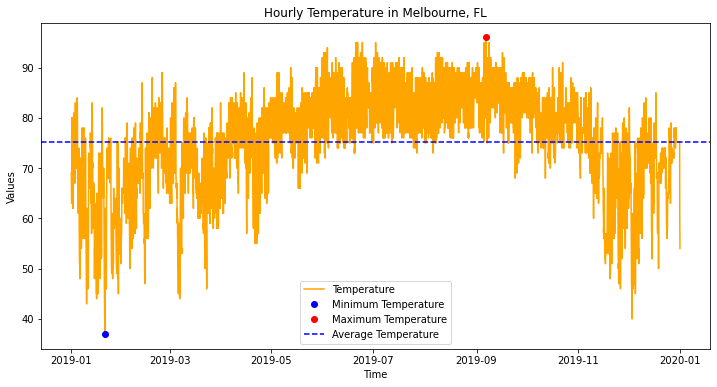

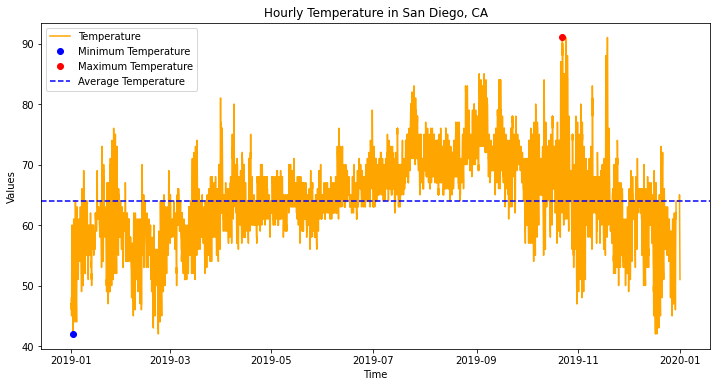

In [40]:
#Plot the temperature values as a line graph of both datsets.
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the temperature values as a line graph - Melbourne climate data
ax.plot(melbourne_data_decent['time'], melbourne_data_decent['temp'], label='Temperature', color='orange')

# Mark the minimum and maximum temperature values on the graph as shaded dots - Melbourne climate data
ax.plot(melbourne_data_decent['time'].iloc[melbourne_data_decent['temp'].idxmin()], melbourne_data_decent['temp'].min(), 'ko', label='Minimum Temperature', color='blue')
ax.plot(melbourne_data_decent['time'].iloc[melbourne_data_decent['temp'].idxmax()], melbourne_data_decent['temp'].max(), 'ko', label='Maximum Temperature',color='red')

# Plot horizontal lines for the average temperature of the year - Melbourne climate data
ax.axhline(y=avg_temp, linestyle='--', color='blue', label='Average Temperature')

# Set the title and axis labels - Melbourne climate data
ax.set_title('Hourly Temperature in Melbourne, FL')
ax.set_xlabel('Time')
ax.set_ylabel('Values')

# Add a legend and display the plot - Melbourne climate data
ax.legend()
plt.show()

# San Diego Climate data
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the temperature values as a line graph - San Diego climate data
ax.plot(sanDiego_data_decent['time'], sanDiego_data_decent['temp'], label='Temperature', color='orange')

# Mark the minimum and maximum temperature values on the graph as shaded dots - San Diego climate data
ax.plot(sanDiego_data_decent['time'].iloc[sanDiego_data_decent['temp'].idxmin()], sanDiego_data_decent['temp'].min(), 'ko', label='Minimum Temperature', color='blue')
ax.plot(sanDiego_data_decent['time'].iloc[sanDiego_data_decent['temp'].idxmax()], sanDiego_data_decent['temp'].max(), 'ko', label='Maximum Temperature',color='red')

# Plot horizontal lines for the average temperature of the year - San Diego climate data
ax.axhline(y=avg_temp_sanDiego, linestyle='--', color='blue', label='Average Temperature')

# Set the title and axis labels - San Diego climate data
ax.set_title('Hourly Temperature in San Diego, CA')
ax.set_xlabel('Time')
ax.set_ylabel('Values')

# Add a legend and display the plot - San Diego climate data
ax.legend()
plt.show()


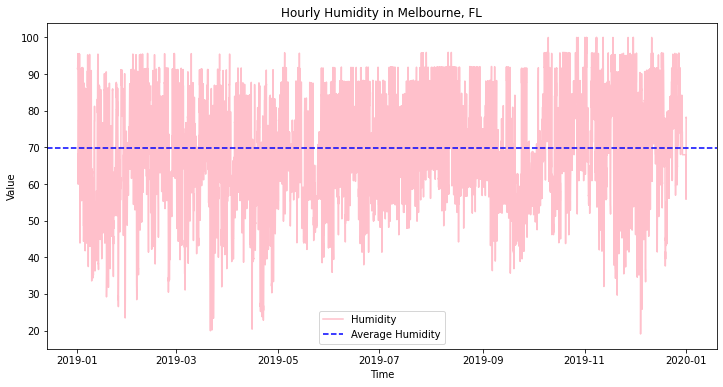

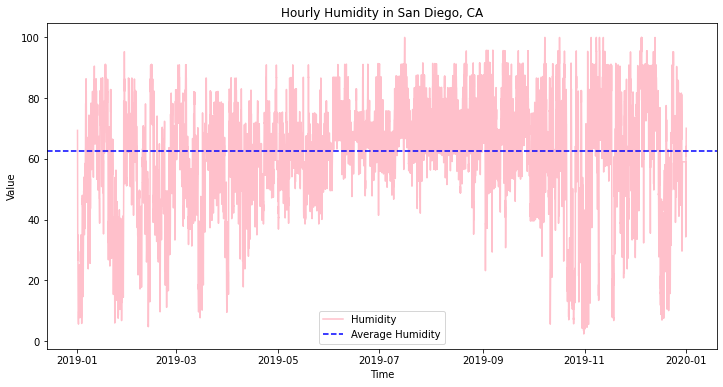

In [41]:
#Plot the humidity values as a line graph - Melbourne climate data
avg_hum = melbourne_data_decent['H'].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the humidity values as a line graph - Melbourne climate data
ax.plot(melbourne_data_decent['time'], melbourne_data_decent['H'], label='Humidity',color='pink')

# Plot horizontal lines for the average humidity of the year - Melbourne climate data
ax.axhline(y=avg_hum, linestyle='--', color='blue', label='Average Humidity')

# Set the title and axis labels - Melbourne climate data
ax.set_title('Hourly Humidity in Melbourne, FL')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# Add a legend and display the plot - Melbourne climate data
ax.legend()
plt.show()

#San Diego
#Plot the humidity values as a line graph - San Diego climate data
avg_hum_sanDiego = sanDiego_data_decent['H'].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the humidity values as a line graph - San Diego climate data
ax.plot(sanDiego_data_decent['time'], sanDiego_data_decent['H'], label='Humidity',color='pink')

# Plot horizontal lines for the average humidity of the year - San Diego climate data
ax.axhline(y=avg_hum_sanDiego, linestyle='--', color='blue', label='Average Humidity')

# Set the title and axis labels - San Diego climate data
ax.set_title('Hourly Humidity in San Diego, CA')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# Add a legend and display the plot - San Diego climate data
ax.legend()
plt.show()

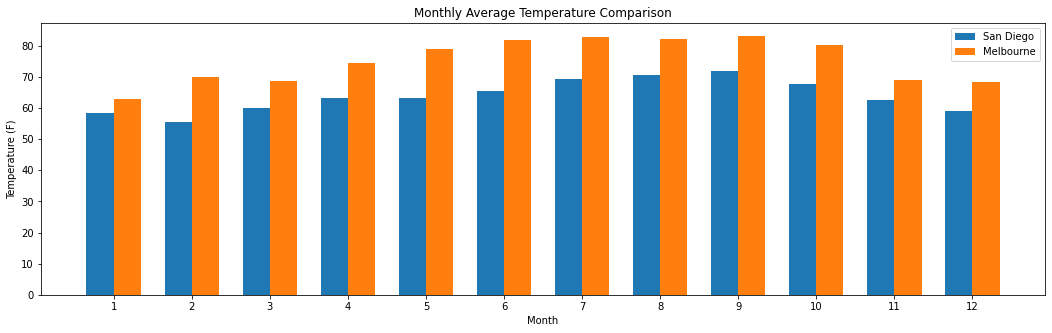

In [70]:
# Convert the 'time' column to time format
sanDiego_data_decent['time'] = pd.to_datetime(sanDiego_data_decent['time'])
melbourne_data_decent['time'] = pd.to_datetime(melbourne_data_decent['time'])

# Extract the month from the 'time' column
sanDiego_data_decent['month'] = sanDiego_data_decent['time'].dt.month
melbourne_data_decent['month'] = melbourne_data_decent['time'].dt.month

# Calculate the monthly average temperature for San Diego
sd_monthly = sanDiego_data_decent.groupby('month')['temp'].mean()

# Calculate the monthly average temperature for Melbourne
melb_monthly = melbourne_data_decent.groupby('month')['temp'].mean()

# Create a grouped bar plot for both cities
fig, ax = plt.subplots(figsize=(18, 5))
bar_width = 0.35
x_pos = np.arange(len(sd_monthly))

ax.bar(x_pos, sd_monthly, bar_width, label='San Diego')
ax.bar(x_pos + bar_width, melb_monthly, bar_width, label='Melbourne')

# Add labels, title, and legend to the plot
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (F)')
ax.set_title('Monthly Average Temperature Comparison')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(sd_monthly.index)
ax.legend()

# Show the plot
plt.show()

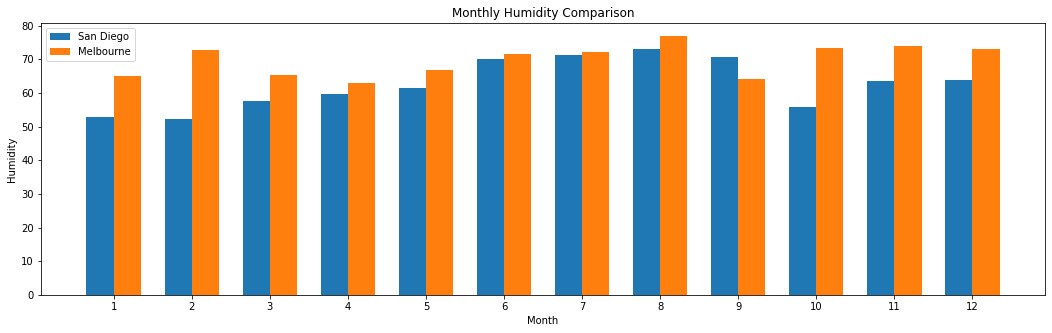

In [77]:
sanDiego_data_decent['time'] = pd.to_datetime(sanDiego_data_decent['time'])
melbourne_data_decent['time'] = pd.to_datetime(melbourne_data_decent['time'])

# Extract the month from the 'time' column
sanDiego_data_decent['month'] = sanDiego_data_decent['time'].dt.month
melbourne_data_decent['month'] = melbourne_data_decent['time'].dt.month

# Calculate the monthly average temperature for San Diego
sd_monthly = sanDiego_data_decent.groupby('month')['H'].mean()

# Calculate the monthly average temperature for Melbourne
melb_monthly = melbourne_data_decent.groupby('month')['H'].mean()

# Create a grouped bar plot for both cities
fig, ax = plt.subplots(figsize=(18, 5))
bar_width = 0.35
x_pos = np.arange(len(sd_monthly))

ax.bar(x_pos, sd_monthly, bar_width, label='San Diego')
ax.bar(x_pos + bar_width, melb_monthly, bar_width, label='Melbourne')

# Add labels, title, and legend to the plot
ax.set_xlabel('Month')
ax.set_ylabel('Humidity')
ax.set_title('Monthly Humidity Comparison')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(sd_monthly.index)
ax.legend()

# Show the plot
plt.show()

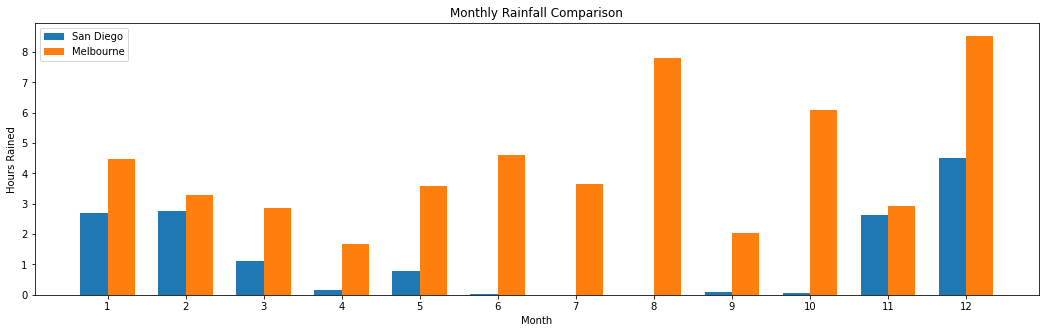

In [76]:
sanDiego_data_decent['time'] = pd.to_datetime(sanDiego_data_decent['time'])
melbourne_data_decent['time'] = pd.to_datetime(melbourne_data_decent['time'])

# Extract the month from the 'time' column
sanDiego_data_decent['month'] = sanDiego_data_decent['time'].dt.month
melbourne_data_decent['month'] = melbourne_data_decent['time'].dt.month

# Calculate the monthly average temperature for San Diego
sd_monthly = sanDiego_data_decent.groupby('month')['precip_1hr'].sum()

# Calculate the monthly average temperature for Melbourne
melb_monthly = melbourne_data_decent.groupby('month')['precip_1hr'].sum()

# Create a grouped bar plot for both cities
fig, ax = plt.subplots(figsize=(18, 5))
bar_width = 0.35
x_pos = np.arange(len(sd_monthly))

ax.bar(x_pos, sd_monthly, bar_width, label='San Diego')
ax.bar(x_pos + bar_width, melb_monthly, bar_width, label='Melbourne')

# Add labels, title, and legend to the plot
ax.set_xlabel('Month')
ax.set_ylabel('Hours Rained')
ax.set_title('Monthly Rainfall Comparison')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(sd_monthly.index)
ax.legend()

# Show the plot
plt.show()